In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Fighter Dataset
file_path_fr = 'fighter_stats.csv'
fr_df = pd.read_csv(file_path_fr)

# Adjust pd settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h1 style="text-align: center; color:#1eb0fc">Exploratory Data Analysis (EDA) of Reach and Height Impact on Fighters Across Weight Classes</h1>

<div><b>The aim of this project is to analyze the impact of reach and height on fighters across different weight classes.</b></div>

<h3 style="color: #1eb0fc;">Data Frame Content</h3>
<ul>
    <li><b>name:</b> The name of the fighter.</li>
    <li><b>wins:</b> The number of wins the fighter has secured.</li>
    <li><b>losses:</b> The number of losses the fighter has suffered.</li>
    <li><b>height:</b> The height of the fighter (cm).</li>
    <li><b>weight:</b> The weight of the fighter (kg).</li>
    <li><b>reach:</b> The reach of the fighter (cm).</li>
    <li><b>stance:</b> The fighting stance of the fighter (e.g., orthodox, southpaw).</li>
    <li><b>age:</b> The age of the fighter.</li>
    <li><b>SLpM:</b> Significant Strikes Landed per Minute - a measure of striking activity.</li>
    <li><b>sig_str_acc:</b> Significant Strike Accuracy - the percentage of significant strikes that land.</li>
    <li><b>SApM:</b> Significant Strikes Absorbed per Minute - a measure of defensive ability.</li>
    <li><b>str_def:</b> Strike Defense - the percentage of significant strikes defended.</li>
    <li><b>td_avg:</b> Takedown Average - the average number of takedowns per 15 minutes.</li>
    <li><b>td_acc:</b> Takedown Accuracy - the percentage of takedown attempts that are successful.</li>
    <li><b>td_def:</b> Takedown Defense - the percentage of opponent takedown attempts that are defended.</li>
    <li><b>sub_avg:</b> Submission Average - the average number of submission attempts per 15 minutes.</li>
</ul>
<p><em>Note : This dataframe has both woman and man fighters included. </em></p>
   

    


In [3]:
fr_df.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [4]:
fr_df.duplicated().sum()

0

In [5]:
fr_df.isnull().sum()

name             1
wins             1
losses           1
height           1
weight           1
reach          656
stance          78
age            161
SLpM             1
sig_str_acc      1
SApM             1
str_def          1
td_avg           1
td_acc           1
td_def           1
sub_avg          1
dtype: int64

<h4>Quality issue</h4>
<ul>
    <li>We have 656 null values in reach column since this project about reach and height i will drop the missing value rows.</li>
    <li>In alternative scenerio we can fill the missing values by mean but it can effect the quality of the analysis</li>
</ul>


In [7]:
# Dropped all the missing value rows
fr_df.dropna(inplace=True)
fr_df.drop_duplicates()
fr_df.reset_index(drop=True, inplace=True)

In [8]:
fr_df.isnull().sum()

name           0
wins           0
losses         0
height         0
weight         0
reach          0
stance         0
age            0
SLpM           0
sig_str_acc    0
SApM           0
str_def        0
td_avg         0
td_acc         0
td_def         0
sub_avg        0
dtype: int64

In [9]:
fr_df.shape

(1817, 16)

In [10]:
fr_df.dtypes

name            object
wins           float64
losses         float64
height         float64
weight         float64
reach          float64
stance          object
age            float64
SLpM           float64
sig_str_acc    float64
SApM           float64
str_def        float64
td_avg         float64
td_acc         float64
td_def         float64
sub_avg        float64
dtype: object

In [11]:
fr_df.describe()

,wins,losses,height,weight,reach,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,15.269675,6.053385,177.626659,73.752603,182.059428,35.949917,3.456549,0.445691,3.640242,0.534507,1.559136,0.364188,0.573275,0.603522
std,7.655289,3.945793,8.960759,15.501255,10.649188,6.077620,1.522661,0.088917,1.731408,0.083462,1.442654,0.224046,0.244876,0.860328
min,0.000000,0.000000,152.400000,52.160000,147.320000,19.000000,0.000000,0.000000,0.400000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000,170.180000,61.230000,175.260000,31.000000,2.450000,0.390000,2.620000,0.480000,0.500000,0.240000,0.440000,0.000000
50%,14.000000,5.000000,177.800000,70.310000,182.880000,35.000000,3.300000,0.450000,3.400000,0.540000,1.220000,0.360000,0.610000,0.400000
75%,19.000000,8.000000,182.880000,83.910000,190.500000,40.000000,4.260000,0.500000,4.350000,0.590000,2.260000,0.500000,0.740000,0.800000
max,91.000000,26.000000,210.820000,120.200000,213.360000,60.000000,23.330000,1.000000,42.000000,0.840000,11.690000,1.000000,1.000000,13.800000


<h1 style="color: #1eb0fc;">Data Transformation and Feature Engineering</h1>

<h3>Handling Data types, renaming columns</h3>

In [14]:
fr_df.rename(columns = {"height":"height_cm","weight":"weight_lbs","reach":"reach_cm"}, inplace=True)

cols_to_int = ['wins', 'losses', 'age','height_cm','reach_cm']

fr_df[cols_to_int] = fr_df[cols_to_int].astype(int)

fr_df.dtypes

name            object
wins             int32
losses           int32
height_cm        int32
weight_lbs     float64
reach_cm         int32
stance          object
age              int32
SLpM           float64
sig_str_acc    float64
SApM           float64
str_def        float64
td_avg         float64
td_acc         float64
td_def         float64
sub_avg        float64
dtype: object

<h3>Transforming Data: Weight Classes and Performance Metrics</h3>

In [16]:
# Determining Weight Classes
weight_bins = [0, 115, 125, 135, 145, 155, 170, 185, 205, 265]
weight_labels = ['Strawweight', 'Flyweight', 'Bantamweight', 'Featherweight', 
                'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight',
                'Heavyweight']


# Convert weight from kg to lbs
fr_df["weight_lbs"] = np.round(fr_df["weight_lbs"] * 2.2046, 1)

# Classify fighters into weight classes
fr_df["weight_class"] = pd.cut(fr_df["weight_lbs"], labels=weight_labels, bins=weight_bins)

# Calculate reach-to-height ratio
fr_df["reach/height"] = np.round(fr_df["reach_cm"] / fr_df["height_cm"], 2)

# Calculate win rate
fr_df["winrate"] = fr_df["wins"] / (fr_df["wins"] + fr_df["losses"])

fr_df.head()



,name,wins,losses,height_cm,weight_lbs,reach_cm,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg,weight_class,reach/height,winrate
0,Amanda Ribas,12,5,160,125.0,167,Orthodox,30,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7,Flyweight,1.04,0.705882
1,Rose Namajunas,13,6,165,125.0,165,Orthodox,31,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5,Flyweight,1.00,0.684211
2,Karl Williams,10,1,190,235.0,200,Orthodox,34,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2,Heavyweight,1.05,0.909091
3,Justin Tafa,7,4,182,264.0,187,Southpaw,30,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0,Heavyweight,1.03,0.636364
4,Edmen Shahbazyan,13,4,187,185.0,190,Orthodox,26,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6,Middleweight,1.02,0.764706


<h3>Summary Statistics by Weight Class</h3>

In [18]:
# Define the condition to exclude non related columns
condition = ~fr_df.columns.isin(["name", "stance", "weight_lbs", "age"])
num_df = fr_df.loc[:, condition]

# Group by weight class and calculate summary statistics
summary_stats = num_df.groupby("weight_class").agg(["count", "max", "mean", "min"]).round(2)

summary_stats

wins                losses               height_cm       \
                  count max   mean min  count max  mean min     count  max   
weight_class                                                                 
Strawweight          83  25  10.94   3     83  13  4.92   0        83  170   
Flyweight           185  30  12.55   2    185  21  4.94   0       185  182   
Bantamweight        255  44  13.82   3    255  18  5.53   0       255  185   
Featherweight       220  39  15.28   1    220  19  5.65   0       220  187   
Lightweight         306  53  16.35   2    306  23  6.48   0       306  193   
Welterweight        289  51  16.36   0    289  21  6.49   0       289  195   
Middleweight        209  91  16.84   3    209  22  6.53   0       209  198   
Light Heavyweight   142  37  16.34   1    142  19  7.02   0       142  198   
Heavyweight         128  60  16.12   5    128  26  6.30   0       128  210   

                               reach_cm                    SLpM               \
                     mean  min    count  max    mean  min count    max  mean   
weight_class                                                                   
Strawweight        160.33  152       83  175  161.41  147    83   6.93  3.81   
Flyweight          166.97  157      185  185  170.09  157   185   9.08  3.46   
Bantamweight       170.18  157      255  193  173.82  160   255   8.40  3.52   
Featherweight      174.49  162      220  198  178.75  162   220   8.30  3.59   
Lightweight        177.11  167      306  203  181.26  167   306  11.03  3.35   
Welterweight       181.00  167      289  205  186.33  170   289  10.22  3.32   
Middleweight       184.24  167      209  203  189.66  175   209   8.24  3.36   
Light Heavyweight  187.07  175      142  210  192.44  177   142   9.23  3.36   
Heavyweight        189.38  175      128  213  195.87  182   128  23.33  3.66   

                        sig_str_acc                    SApM               \
                    min       count   max  mean   min count    max  mean   
weight_class                                                               
Strawweight        0.00          83  0.67  0.44  0.00    83   7.98  4.08   
Flyweight          0.77         185  0.71  0.43  0.21   185   9.84  3.68   
Bantamweight       0.20         255  0.69  0.43  0.10   255  15.48  3.79   
Featherweight      1.28         220  1.00  0.45  0.14   220  42.00  3.94   
Lightweight        0.25         306  0.77  0.43  0.20   306  11.90  3.55   
Welterweight       0.31         289  0.69  0.44  0.20   289  12.83  3.43   
Middleweight       0.18         209  0.73  0.46  0.08   209   7.15  3.45   
Light Heavyweight  0.43         142  0.79  0.47  0.18   142   7.24  3.56   
Heavyweight        0.85         128  0.77  0.48  0.19   128  11.54  3.58   

                        str_def                   td_avg                    \
                    min   count   max  mean   min  count    max  mean  min   
weight_class                                                                 
Strawweight        0.45      83  0.80  0.54  0.31     83   6.20  1.45  0.0   
Flyweight          1.11     185  0.74  0.54  0.27    185   9.69  1.66  0.0   
Bantamweight       0.56     255  0.84  0.54  0.28    255   6.75  1.45  0.0   
Featherweight      1.33     220  0.78  0.54  0.28    220   6.44  1.58  0.0   
Lightweight        0.46     306  0.76  0.55  0.31    306  11.41  1.63  0.0   
Welterweight       0.55     289  0.78  0.54  0.23    289   7.28  1.55  0.0   
Middleweight       0.40     209  0.78  0.53  0.28    209  11.69  1.72  0.0   
Light Heavyweight  0.74     142  0.72  0.51  0.13    142   7.19  1.53  0.0   
Heavyweight        1.18     128  0.81  0.50  0.04    128   8.93  1.26  0.0   

                  td_acc                 td_def                 sub_avg        \
                   count  max  mean  min  count  max  mean  min   count   max   
weight_class                                                                    
Strawweight           83  1.

<h1 style="color: #1eb0fc;">Data Visualisation</h1>

<h3>Weight Class Distribution by Number of Fighters</h3>

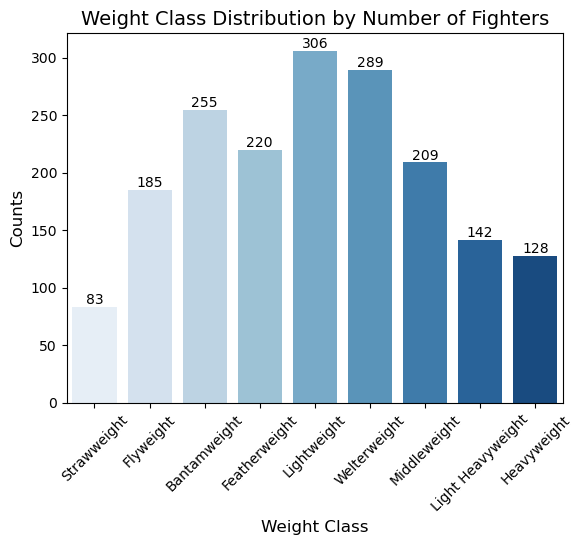

In [21]:
# Calculate the number of fighters in each weight class
weight_dist_by_count = fr_df["weight_class"].value_counts(ascending=False)

# Bar plot
barplot = sns.barplot(x=weight_dist_by_count.index,
                      y=weight_dist_by_count.values,
                      palette='Blues')

# Adding labels to the bars
for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)

# Plt Adjustments
plt.title('Weight Class Distribution by Number of Fighters', fontsize=14)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Counts', fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

<h3>Weight Class Distribution by Percentages</h3>

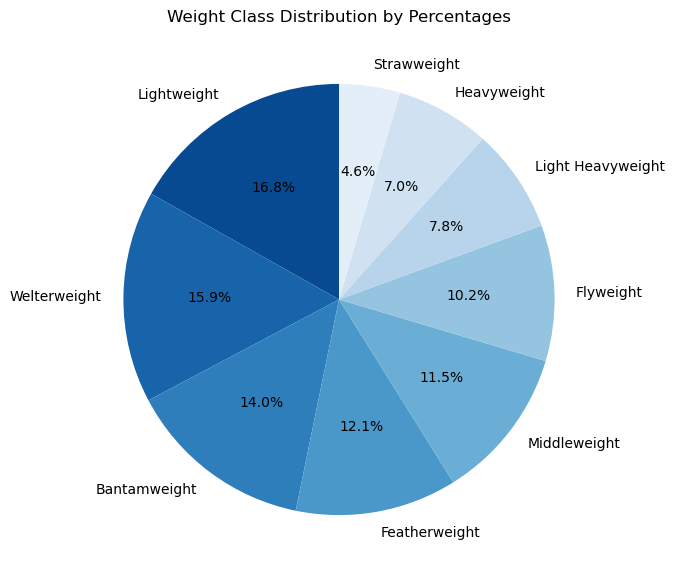

In [23]:
# Calculate the percentage of fighters in each weight class
weight_dist_by_perc = fr_df["weight_class"].value_counts(normalize=True)

# Pie Chart configurations
plt.figure(figsize=(7, 7))
plt.pie(weight_dist_by_perc,
        labels=weight_dist_by_perc.index,
        autopct='%1.1f%%',
        colors=list(reversed(sns.color_palette('Blues', len(weight_dist_by_perc)))),
        startangle=90)

# PLt Adjustments
plt.title('Weight Class Distribution by Percentages')

plt.show()

<h3>Height Range by Weight Class</h3>

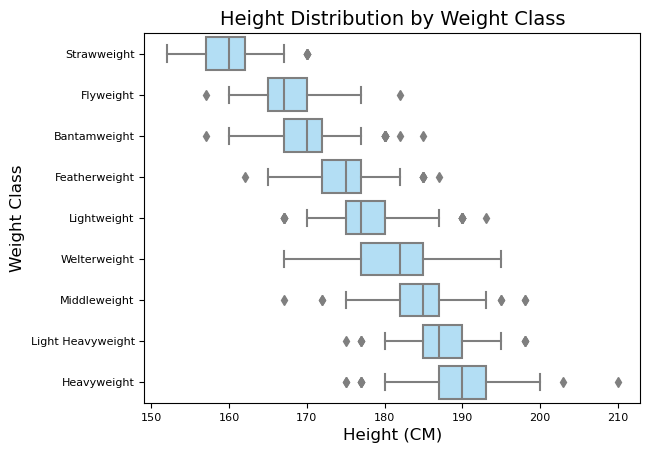

In [25]:
# Height Range by weight class

# Box plot
sns.boxplot(data=fr_df, y="weight_class", x="height_cm", color="#a8e1ff")

# Plt Adjustments
plt.title('Height Distribution by Weight Class', fontsize=14)
plt.xlabel('Height (CM)', fontsize=12)
plt.ylabel('Weight Class', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

<h3>Reach Range by Weight Class</h3>

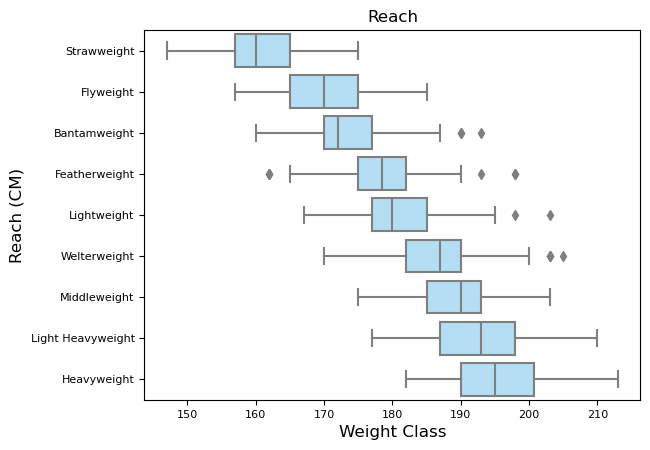

In [27]:
# Reach Range by weight class

# Box Plot
sns.boxplot(data = fr_df,
            y="weight_class",
            x="reach_cm",
            color="#a8e1ff")

# Plt Adjustments
plt.title('Reach')
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Reach (CM)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

<h3>Reach - Height - Weight Class relationship</h3>

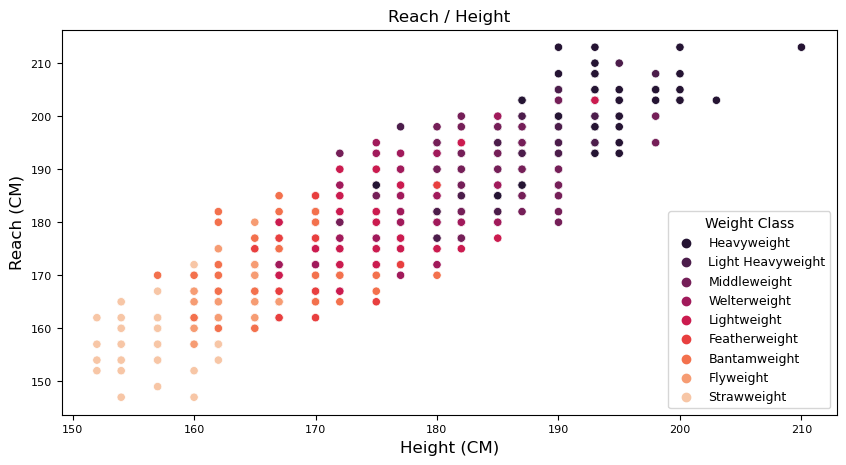

In [29]:

# Defining table size
plt.figure(figsize=(10,5))

# To make heavier weights appearing darker in color
weight_class_order = ["Heavyweight", "Light Heavyweight", "Middleweight",
                      "Welterweight", "Lightweight", "Featherweight",
                      "Bantamweight", "Flyweight", "Strawweight"]

# Scatter Plot
sns.scatterplot(x="height_cm",
                y="reach_cm",
                hue="weight_class",
                palette="rocket",
                hue_order=weight_class_order,
                data=fr_df)

# Plt adjustments
plt.title('Reach / Height')
plt.xlabel('Height (CM)', fontsize=12)
plt.ylabel('Reach (CM)', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Weight Class',fontsize=9)

plt.show()

<h1 style="color: #1eb0fc;">Comparing Short fighters to Tall fighters by weight class</h1>

In [31]:
#Defining the 75th Percentile and 25th percentile height by weight class
upper_th = fr_df.groupby("weight_class")["height_cm"].quantile(0.75)
lower_th = fr_df.groupby("weight_class")["height_cm"].quantile(0.25)

# Filtering the data by applying threshold conditions
short_fighters = fr_df.apply(lambda x: x['height_cm'] < lower_th.loc[x['weight_class']], axis=1) #Fighter is considered short if he is shorter than the 25th percentile of their weight class
tall_fighters = fr_df.apply(lambda x: x['height_cm'] > upper_th.loc[x['weight_class']], axis=1) #Fighter is considered tall if he is taller than the 75th percentile of their weight class

s_df = fr_df[short_fighters]
t_df = fr_df[tall_fighters]

# Defining which stats to compare between fighters 
stats_to_compare = ['SLpM', 'sig_str_acc', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg', 'reach/height', 'winrate']
s_stats = s_df[stats_to_compare].mean()
t_stats = t_df[stats_to_compare].mean()

# Determining the difference 
comparison_results = []
for stat in stats_to_compare:
    if s_stats[stat] < t_stats[stat]:
        diff_percent = ((s_stats[stat] - t_stats[stat]) / s_stats[stat]) * -100
        comparison_results.append(f"Tall fighters are {diff_percent:.2f}% better than short fighters")
  
    else:
        diff_percent = ((t_stats[stat] - s_stats[stat]) / t_stats[stat]) * -100
        comparison_results.append(f"Short fighters are {diff_percent:.2f}% better than tall fighters")
     

# Creating a comparison dataframe 
comparison_df = pd.DataFrame({
    'Short Fighters': s_stats,
    'Tall Fighters': t_stats,
    'Outcome': comparison_results
})
comparison_df.index.name = 'Stats'
comparison_df.head(9)

,Short Fighters,Tall Fighters,Outcome
Stats,,,
SLpM,3.191221,3.797743,Tall fighters are 19.01% better than short fighters
sig_str_acc,0.433285,0.452257,Tall fighters are 4.38% better than short fighters
str_def,0.548081,0.517085,Short fighters are 5.99% better than tall fighters
td_avg,1.754070,1.169498,Short fighters are 49.98% better than tall fighters
td_acc,0.369012,0.341317,Short fighters are 8.11% better than tall fighters
td_def,0.580494,0.535862,Short fighters are 8.33% better than tall fighters
sub_avg,0.533430,0.706270,Tall fighters are 32.40% better than short fighters
reach/height,1.035174,1.017053,Short fighters are 1.78% better than tall fighters
winrate,0.719185,0.725316,Tall fighters are 0.85% better than short fighters


<h1 style="color: #1eb0fc;">Implications and Considerations in MMA Fighter Metrics</h1>
  
  <h2 style="color: #1eb0fc;">Implications:</h2>
  
  <p><strong>Striking vs. Grappling:</strong> Tall fighters generally excel in striking metrics such as SLpM and striking accuracy, whereas short fighters tend to perform better in grappling metrics like takedowns and takedown defense.</p>
  
  <p><strong>Submissions:</strong>Taller fighters have a notable advantage in submissions, suggesting they may have better leverage or technique in securing submissions during fights. Their long limbs can facilitate better submission situations due to increased reach and leverage capabilities.</p>
  
  <p><strong>Overall Performance:</strong> While tall fighters show advantages in certain striking aspects, short fighters demonstrate strengths in grappling-related metrics. These differences can influence fight strategies and outcomes based on individual fighter styles and matchups.</p>
  
  <h2 style="color: #1eb0fc;">Considerations:</h2>
  
  <ul>
    <li><strong>Fighter Attributes:</strong> Factors such as individual skill levels, fighting styles, and strategies employed by fighters can significantly influence these metrics.</li>
        <li><strong>Sample Size:</strong>It's crucial to acknowledge the impact of sample size and missing values on the analysis, as they can introduce biases and affect result accuracy.</li>
       <li><strong>Threshold Determination:</strong> Threshold Determination: The definition of "tall" and "short" fighters based on height percentiles (e.g., above the 75th percentile for tall fighters) can impact the interpretation of these metrics. Different thresholds may yield slightly different insights, so it's important to be transparent about the chosen thresholds and their implications for the analysis.</li>
 

  </ul>

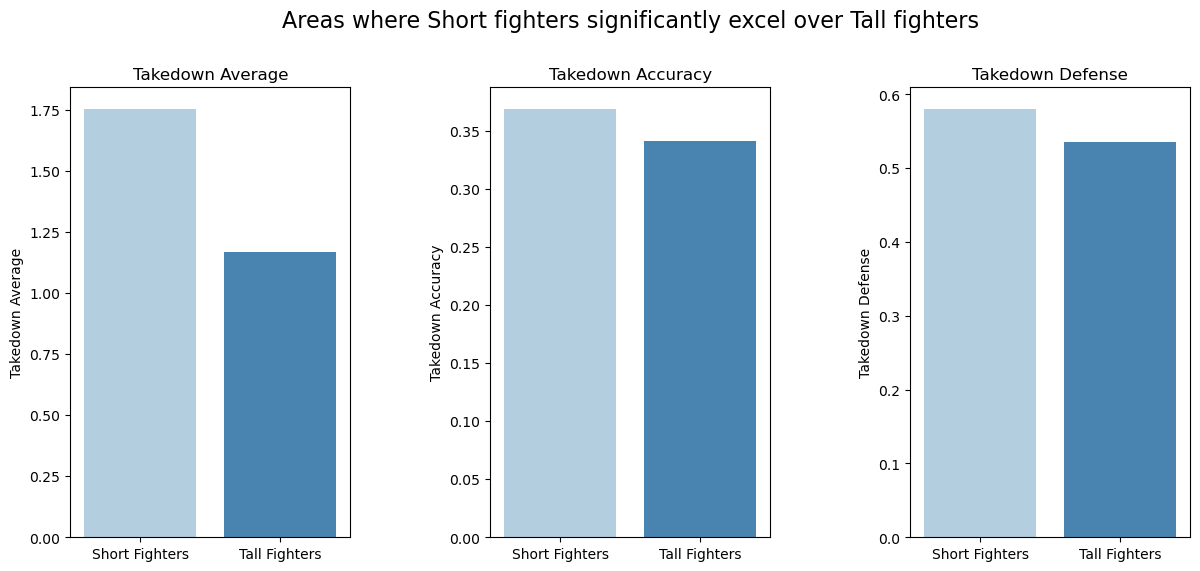

In [33]:
# Areas where Short fighters significantly excel over Tall fighters

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6), gridspec_kw={'wspace': 0.5})
fig.suptitle('Areas where Short fighters significantly excel over Tall fighters', fontsize=16)
fig.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9, hspace=0.2, wspace=0.2)

# Plotting takedown average
sns.barplot(x=['Short Fighters', 'Tall Fighters'],
            y=[s_stats['td_avg'], t_stats['td_avg']], ax=ax1, palette="Blues")
ax1.set_title('Takedown Average')
ax1.set_ylabel('Takedown Average')

# Plotting takedown accuracy
sns.barplot(x=['Short Fighters', 'Tall Fighters'],
            y=[s_stats['td_acc'], t_stats['td_acc']], ax=ax2, palette="Blues")
ax2.set_title('Takedown Accuracy')
ax2.set_ylabel('Takedown Accuracy')

# Plotting takedown defense
sns.barplot(x=['Short Fighters', 'Tall Fighters'],
            y=[s_stats['td_def'], t_stats['td_def']], ax=ax3, palette="Blues")
ax3.set_title('Takedown Defense')
ax3.set_ylabel('Takedown Defense')

plt.show()

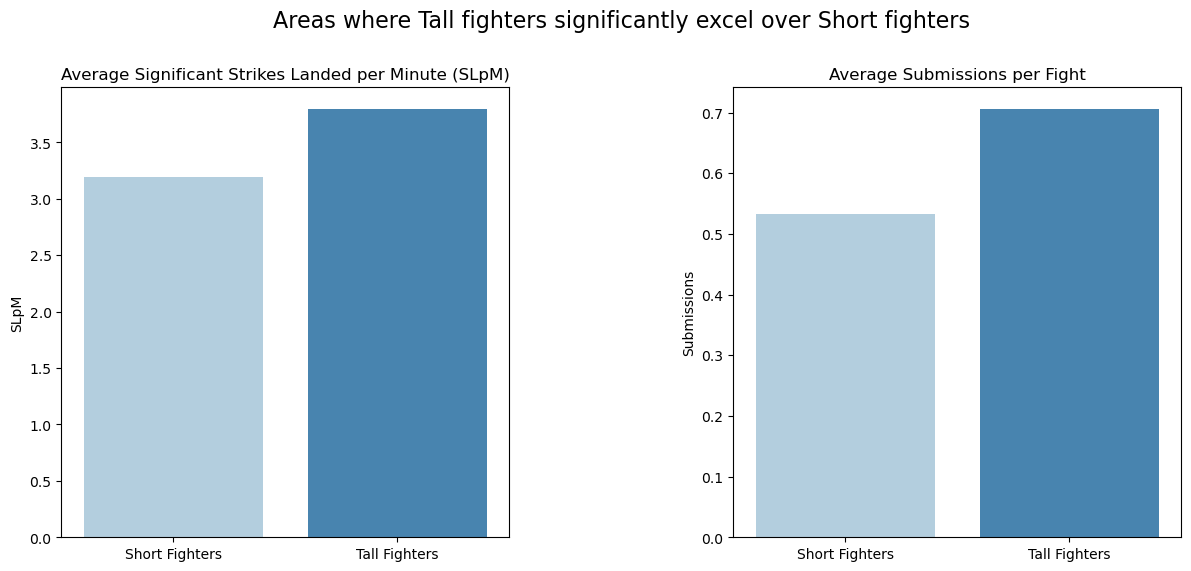

In [34]:
# Areas where Tall fighters significantly excel over Short fighters

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'wspace': 0.5})
fig.suptitle('Areas where Tall fighters significantly excel over Short fighters', fontsize=16)
fig.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9, hspace=0.2, wspace=0.2)


# Plotting SLpM
sns.barplot(x=['Short Fighters', 'Tall Fighters'],
            y=[s_stats['SLpM'], t_stats['SLpM']], ax=ax1, palette="Blues")  
ax1.set_title('Average Significant Strikes Landed per Minute (SLpM)')
ax1.set_ylabel('SLpM')

# Plotting Submissions
sns.barplot(x=['Short Fighters', 'Tall Fighters'],
            y=[s_stats['sub_avg'], t_stats['sub_avg']], palette="Blues")  
ax2.set_title('Average Submissions per Fight')
ax2.set_ylabel('Submissions')


plt.show()

<h1 style="color: #1eb0fc;">Strengths of Tall and Short Fighters in MMA</h1>
    
<div>
    <h2 style="color: #1eb0fc;">Tall Fighters</h2>
    <div>
        <h4>Striking:</h4>
        <p>
            <strong>Strengths:</strong> Tall fighters excel in significant strikes landed per minute (SLpM) and striking accuracy (sig_str_acc). Their longer reach and potentially better striking technique contribute to their effectiveness in stand-up exchanges.
        </p>
            
<h4>Submissions:</h4>
        <p>
            <strong>Strengths:</strong> Taller fighters demonstrate a significant advantage in submissions averaged per fight (sub_avg). Their long limbs provide better leverage and reach, enhancing their ability to secure submissions on the ground.
        </p>
            
<h4>Overall Performance:</h4>
        <p>
            <strong>Strengths:</strong> Tall fighters' strengths lie in their striking prowess and submission capabilities. They often leverage their reach advantage to control the distance and land strikes effectively, while also being proficient in grappling scenarios, particularly in securing submissions.
        </p>
    </div>
</div>
    
<div>
    <h2 style="color: #1eb0fc;">Short Fighters</h2>
    <div>
        <h4>Grappling:</h4>
        <p>
            <strong>Strengths:</strong> Short fighters perform notably better in grappling metrics such as takedowns per fight (td_avg), takedown accuracy (td_acc), and takedown defense (td_def). Their lower center of gravity and potentially higher strength-to-weight ratio aid in executing and defending against takedowns.
        </p>
            
<h4>Striking Defense:</h4>
        <p>
            <strong>Strengths:</strong> Short fighters exhibit superior defense against significant strikes (str_def). They are adept at avoiding strikes, possibly due to better head movement, footwork, and defensive techniques honed for their stature.
        </p>
            
<h4>Overall Performance:</h4>
        <p>
            <strong>Strengths:</strong> Short fighters excel in grappling exchanges, showcasing strong takedown skills and defense. They are resilient in avoiding significant strikes and excel in close-quarters combat, making them formidable opponents in the clinch and on the ground.
        </p>
    </div>
</div> 

<h1 style="color: red; text-align: center;">Conclusion</h1>

<ul>
  <li>Understanding these strengths allows coaches and analysts to tailor training strategies and game plans according to fighter height and preferred fighting style.</li>
  <li>Tall fighters in their respective weight class can capitalize on their striking range and submission abilities.</li>
  <li>Short fighters in their respective weight class can leverage their grappling proficiency and defensive capabilities to achieve success in MMA competitions.</li>
</ul>
